# POKEMON

In [33]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle

In [79]:
p = Path("D:\Dataset")
directories = p.glob("*")

pok_data = []
pok_name = []
label_dic = {"Bulbasaur":0,"Meowth":1,"Pikachu":2}
label_to_pok_dic = {0:"Bulbasaur",1:"Meowth",2:"Pikachu"}
for folder in directories:
    label = label_dic[str(folder).split('\\')[-1]]
    count = 0
    for img_path in folder.glob("*.jpg"):
        img = image.load_img(img_path , target_size=(40,40))
        img_arr = image.img_to_array(img)
        pok_data.append(img_arr)
        pok_name.append(label)
        count+=1
    print(label,count)

0 173
1 70
2 199


In [80]:
X,Y = np.array(pok_data),np.array(pok_name)

In [81]:
X,Y = shuffle(X,Y,random_state = 2)

In [82]:
X=X/255

In [83]:
def drawimg(img,label):
    plt.axis("off")
    plt.title(label_to_pok_dic[label])
    plt.imshow(img)
    plt.show()

In [84]:
plt.style.use("seaborn")

In [85]:
X = X.reshape((X.shape[0],-1))

In [86]:
X_train , Y_train = X[:353] , Y[:353]
X_test , Y_test = X[353:] , Y[353:]

In [87]:
Y_test

array([1, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 0, 1, 2, 2, 0,
       0, 1, 0, 0, 0, 0, 1, 2, 2, 1, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2,
       0, 1, 0, 2, 0, 0, 2, 1, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0,
       0])

In [88]:
class NeuralNetwroks:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model ={}
        model['W1']=np.random.randn(input_size,layers[0])
        model['b1']=np.zeros((1,layers[0]))
        
        model['W2']=np.random.randn(layers[0],layers[1])
        model['b2']=np.zeros((1,layers[1]))
        
        model['W3']=np.random.randn(layers[1],output_size)
        model['b3']=np.zeros((1,output_size))
        self.model=model
        self.activation_outputs=[]
        
    def softmax(self,v):
        return(np.exp(v)/np.sum(np.exp(v), axis=1, keepdims=True))
    
    def forward_propagation(self,x):
        z1 = np.dot(x,self.model['W1']) + self.model['b1']
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,self.model['W2']) + self.model['b2']
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,self.model['W3']) + self.model['b3']
        y_ = self.softmax(z3)
        
        self.activation_outputs = [a1,a2,y_]
        return (y_)
    
    def backward_propagation(self,x,y,lr=0.001):
        w1,w2,w3=self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        a1,a2,y_ = self.activation_outputs
        m = x.shape[0]
        
        del3 = (y_ - y)
        dw3 = np.dot(a2.T , del3)
        db3 = np.sum(del3 , axis = 0)/m
        
        del2 = (1-np.square(a2))*np.dot(del3,w3.T)
        dw2 = np.dot(a1.T , del2)
        db2 = np.sum(del2 , axis = 0)/m
        
        del1 = (1-np.square(a1))*np.dot(del2,w2.T)
        dw1 = np.dot(x.T , del1)
        db1 = np.sum(del1 , axis = 0)/m
        
        self.model["W1"]  -= lr*dw1
        self.model['b1']  -= lr*db1
        
        self.model["W2"]  -= lr*dw2
        self.model['b2']  -= lr*db2
        
        self.model["W3"]  -= lr*dw3
        self.model['b3']  -= lr*db3
        
    def prediction(self,X):
        y_pred = self.forward_propagation(X)
        return(np.argmax(y_pred,axis=1))
    
    def final(self):
        w1,w2,w3=self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        print("W1 shape :",w1.shape)
        print("a1 shape :",a1.shape)
        print("W2 shape :",w2.shape)
        print("a2 shape :",a2.shape)
        print("W3 shape :",w3.shape)
        print("Y_ shape :",y_.shape)
        
    def loss(self,y,p):
        return(-1*np.mean(y*np.log(p)))
        
    def one_hot_vector(self,y,depth):
        m = y.shape[0]
        y_oht = np.zeros((m,depth))
        y_oht[np.arange(m),y] = 1
        return(y_oht)
def train_model(X,Y,nr,epochs,lr=0.0001,logs=True):
    total_loss = []
    classes = len(np.unique(Y))
    Y_hot = nr.one_hot_vector(Y,classes)
    
    for i in range(epochs):
        Y_ = nr.forward_propagation(X)
        l = nr.loss(Y_hot,Y_)
        total_loss.append(l)
        nr.backward_propagation(X,Y_hot,lr)
    
        if logs and i%50==0:
            print("At epoch ",i,"loss is %.4f"%l)
    return(total_loss)

In [118]:
NN = NeuralNetwroks(input_size=4800 , layers = [100,50], output_size=3)

In [119]:
total_loss = train_model(X_train,Y_train,NN,epochs=500,lr=0.001)

At epoch  0 loss is 1.7377
At epoch  50 loss is 0.6249
At epoch  100 loss is 0.1653
At epoch  150 loss is 0.0534
At epoch  200 loss is 0.0369
At epoch  250 loss is 0.0454
At epoch  300 loss is 0.0201
At epoch  350 loss is 0.0150
At epoch  400 loss is 0.0126
At epoch  450 loss is 0.0110


In [120]:
plt.style.use("dark_background")

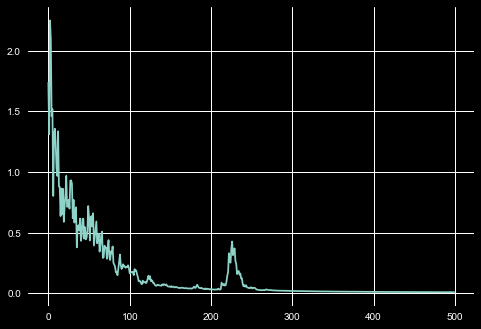

In [121]:
plt.plot(total_loss)

In [122]:
def getAccuracy(X,Y,model):
    outputs = model.prediction(X)
    acc = np.sum(outputs==Y)/Y.shape[0]
    return acc
    
print("Train Acc %.4f"%getAccuracy(X,Y,NN))
print("Test Acc %.4f"%getAccuracy(X_test,Y_test,NN))

Train Acc 0.9321
Test Acc 0.6966


In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [123]:
pred = NN.prediction(X)

In [124]:
cnf_mat = confusion_matrix(pred,Y)
print(cnf_mat)

[[163   3   3]
 [  3  62   9]
 [  7   5 187]]


Confusion matrix, without normalization
[[163   3   3]
 [  3  62   9]
 [  7   5 187]]


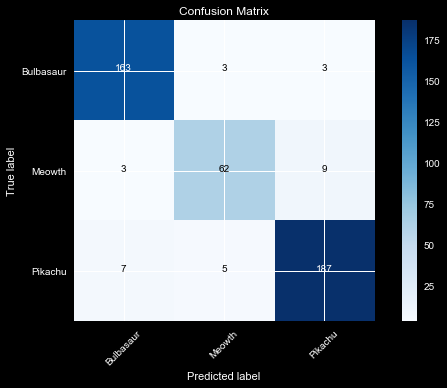

In [127]:
plot_confusion_matrix(cnf_mat,classes=["Bulbasaur","Meowth","Pikachu"],title="Confusion Matrix")

In [104]:
from sklearn.metrics import classification_report

In [126]:
print(classification_report(pred,Y))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       169
           1       0.89      0.84      0.86        74
           2       0.94      0.94      0.94       199

   micro avg       0.93      0.93      0.93       442
   macro avg       0.92      0.91      0.92       442
weighted avg       0.93      0.93      0.93       442



Confusion matrix, without normalization
[[32  3  3]
 [ 3  3  8]
 [ 6  4 27]]


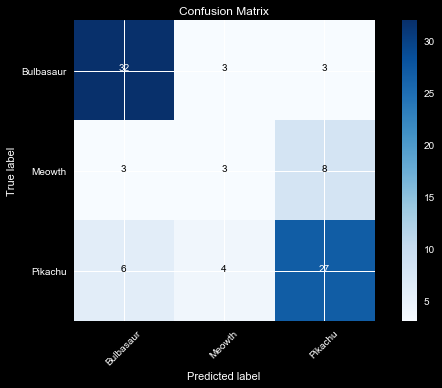

In [128]:
pred_test = NN.prediction(X_test)
cnf_mat_test = confusion_matrix(pred_test,Y_test)
plot_confusion_matrix(cnf_mat_test,classes=["Bulbasaur","Meowth","Pikachu"],title="Confusion Matrix")

In [129]:
print(classification_report(pred_test,Y_test))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        38
           1       0.30      0.21      0.25        14
           2       0.71      0.73      0.72        37

   micro avg       0.70      0.70      0.70        89
   macro avg       0.60      0.60      0.59        89
weighted avg       0.68      0.70      0.68        89

